In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import result
all_result = result.Results()

In [2]:
data_list_feature_wise = {'wpbc': 33,
 'ionosphere': 34,
 'wdbc': 30,
 'australian': 14,
 'wbc': 9,
 'diabetes_f': 8,
 'german': 24,
 'ipd': 24,
 'svmguide3': 21,
 'krvskp': 36,
 'spambase': 57,
 'magic04': 10,
 'a8a': 123,
 'susy': 8,
 'higgs': 21}

data_instance = {'wpbc': 198,
 'ionosphere': 351,
 'wdbc': 569,
 'australian': 690,
 'wbc': 699,
 'diabetes_f': 768,
 'german': 959,
 'ipd': 1096,
 'svmguide3': 1243,
 'krvskp': 3196,
 'spambase': 3601,
 'magic04': 19020,
 'a8a': 32561,
 'susy': 1000000,
 'higgs': 1000000}

<Axes: >

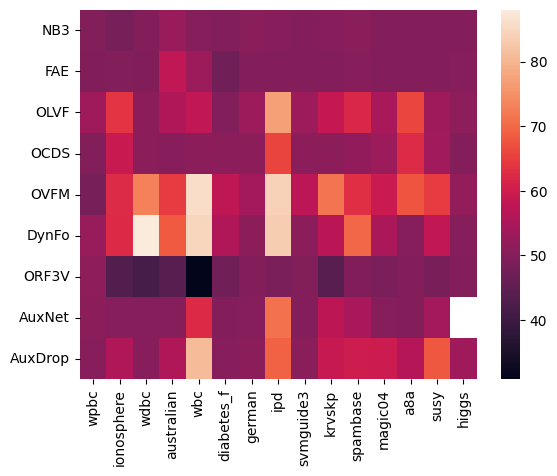

In [3]:
# Increasing Instances
 
data_25 = pd.DataFrame(all_result.synthetic_25_mean)
data_50 = pd.DataFrame(all_result.synthetic_50_mean)
data_75 = pd.DataFrame(all_result.synthetic_75_mean)
data_instance_wise = (data_25 + data_50 + data_75)/3

sns.heatmap(data_instance_wise.T)

In [4]:
data_instance_wise_subtract = data_instance_wise - data_instance_wise.loc['wpbc']

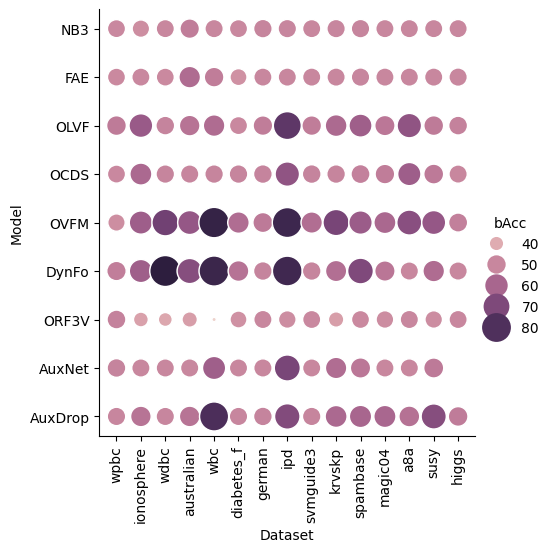

In [5]:
# Increasing instances

data_prev = data_instance_wise
data = []
for i in range(data_prev.shape[0]):
    for j in range(data_prev.shape[1]):
        data.append([data_prev.index[i], data_prev.columns[j], data_prev.iloc[i, j]])
data_sns = pd.DataFrame(data, columns=['Dataset', 'Model', 'bAcc']) 

# x="Dataset", y="Prob", col="Model", size="bAcc", sizes=(10, 200), col_wrap=3, col="time", hue="time", palette=["b", "r"] style="Model", col_wrap=2

my_plot = sns.relplot(data_sns, x= 'Dataset', y = 'Model', size = 'bAcc', hue = 'bAcc', sizes=(10, 500))
my_plot.tick_params(axis='x', rotation=90)

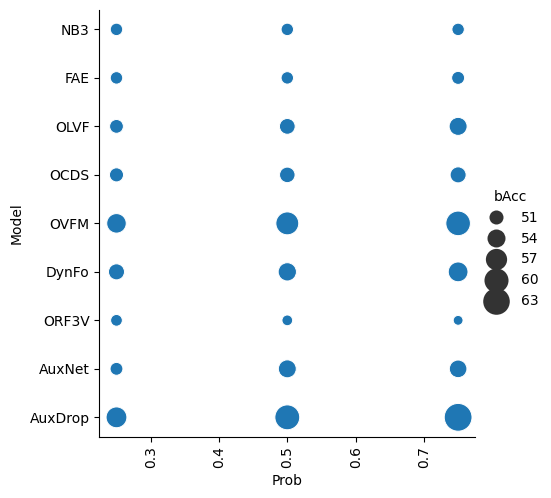

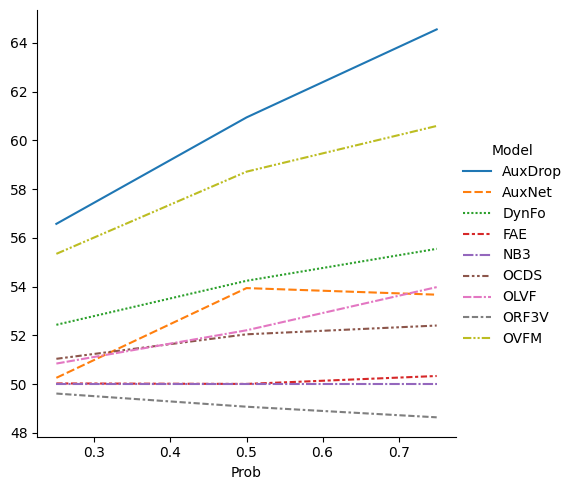

In [37]:
# Increasing p
data_list = list(set(all_result.data_large_list) - set(all_result.data_real_list))
data_25 = pd.DataFrame(all_result.synthetic_25_mean).loc[list(data_list)].mean()
data_50 = pd.DataFrame(all_result.synthetic_50_mean).loc[list(data_list)].mean()
data_75 = pd.DataFrame(all_result.synthetic_75_mean).loc[list(data_list)].mean()

data_p_wise = pd.concat([data_25, data_50, data_75], axis = 1)
data_p_wise.columns = [.25, .50, 0.75]

data_prev = data_p_wise
data = []
for i in range(data_prev.shape[0]):
    for j in range(data_prev.shape[1]):
        data.append([data_prev.index[i], data_prev.columns[j], data_prev.iloc[i, j]])
data_sns = pd.DataFrame(data, columns=['Model', 'Prob', 'bAcc']) 
my_plot = sns.relplot(data_sns, x= 'Prob', y = 'Model', size = 'bAcc', sizes=(50, 400)) # hue = 'bAcc', 
my_plot.tick_params(axis='x', rotation=90)
# sns.move_legend(my_l, "upper left", bbox_to_anchor=(1, 1))

data_sns = data_sns.pivot(index="Prob", columns="Model", values="bAcc")
sns.relplot(data=data_sns, kind="line")
# data_sns

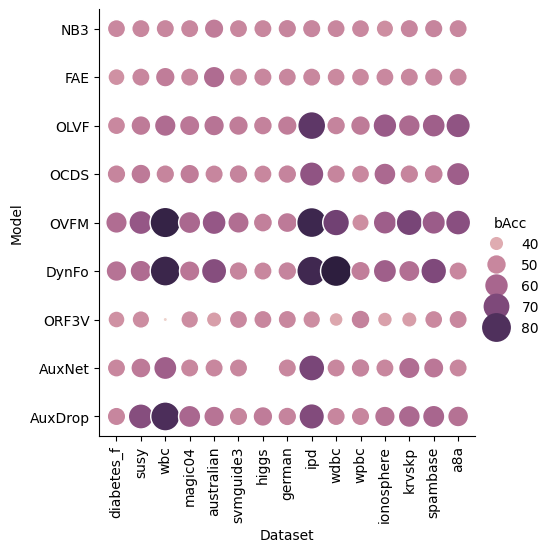

In [7]:
# Increasing features
data_list_feature_wise = {key: value for key, value in sorted(data_list_feature_wise.items(), key=lambda item: item[1])}
data_feature_wise = data_instance_wise.reindex(list(data_list_feature_wise.keys()))
data_prev = data_feature_wise
data = []
for i in range(data_prev.shape[0]):
    for j in range(data_prev.shape[1]):
        data.append([data_prev.index[i], data_prev.columns[j], data_prev.iloc[i, j]])
data_sns = pd.DataFrame(data, columns=['Dataset', 'Model', 'bAcc']) 

# x="Dataset", y="Prob", col="Model", size="bAcc", sizes=(10, 200), col_wrap=3, col="time", hue="time", palette=["b", "r"] style="Model", col_wrap=2

my_plot = sns.relplot(data_sns, x= 'Dataset', y = 'Model', size = 'bAcc', hue = 'bAcc', sizes=(10, 500))
my_plot.tick_params(axis='x', rotation=90)

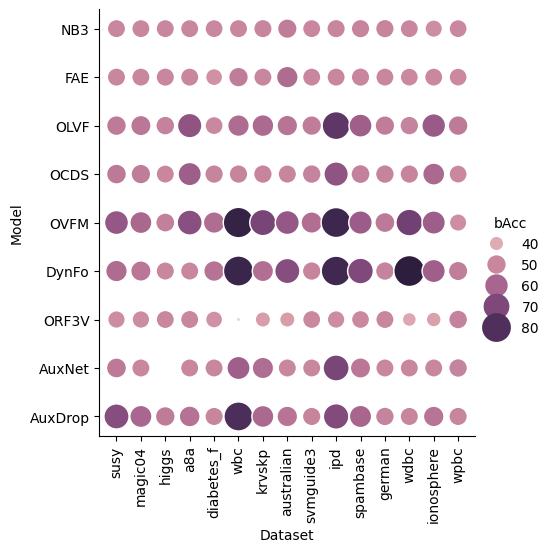

In [8]:
# Dimensionality curse
data_dimensionality = {}
for d in list(data_list_feature_wise.keys()):
    data_dimensionality[d] = np.round(data_list_feature_wise[d]/data_instance[d], 2)

data_dimensionality = {key: value for key, value in sorted(data_dimensionality.items(), key=lambda item: item[1])}
data_feature_wise = data_instance_wise.reindex(list(data_dimensionality.keys()))
data_prev = data_feature_wise
data = []
for i in range(data_prev.shape[0]):
    for j in range(data_prev.shape[1]):
        data.append([data_prev.index[i], data_prev.columns[j], data_prev.iloc[i, j]])
data_sns = pd.DataFrame(data, columns=['Dataset', 'Model', 'bAcc']) 

# x="Dataset", y="Prob", col="Model", size="bAcc", sizes=(10, 200), col_wrap=3, col="time", hue="time", palette=["b", "r"] style="Model", col_wrap=2

my_plot = sns.relplot(data_sns, x= 'Dataset', y = 'Model', size = 'bAcc', hue = 'bAcc', sizes=(10, 500))
my_plot.tick_params(axis='x', rotation=90)

In [9]:
data_sns

,Dataset,Model,bAcc
0,susy,NB3,50.000000
1,susy,FAE,50.010000
2,susy,OLVF,53.436667
3,susy,OCDS,53.660000
4,susy,OVFM,64.613333
...,...,...,...
130,wpbc,OVFM,48.076667
131,wpbc,DynFo,52.603333
132,wpbc,ORF3V,51.283333
133,wpbc,AuxNet,50.996667


KeyError


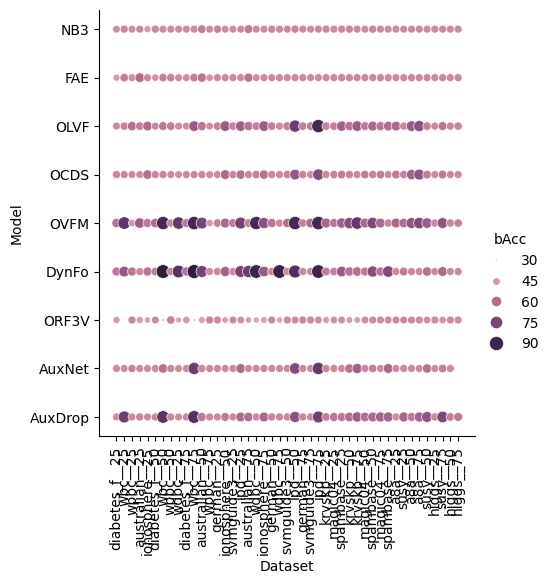

In [10]:
# Volume Wise

data_volume_list = {}

for d in list(data_instance.keys()):
    for p in [.25, .5, .75]:
        data_volume_list[d + "__" + str(int(p*100))] = int(data_instance[d]*data_list_feature_wise[d]*p)

data_volume_list = {key: value for key, value in sorted(data_volume_list.items(), key=lambda item: item[1])}

data_volume = []
for k in list(data_volume_list.keys()):
    data_name, p = k.split('__')[0], k.split('__')[1]
    for m in list(all_result.synthetic_25_mean.keys()):
        try:
            if p == "25": val = all_result.synthetic_25_mean[m][data_name]
            if p == "50": val = all_result.synthetic_50_mean[m][data_name]
            if p == "75": val = all_result.synthetic_75_mean[m][data_name]
            data_volume.append([k, m, val])
        except KeyError:
            print("KeyError")
            
data_sns = pd.DataFrame(data_volume, columns=['Dataset', 'Model', 'bAcc']) 

# x="Dataset", y="Prob", col="Model", size="bAcc", sizes=(10, 200), col_wrap=3, col="time", hue="time", palette=["b", "r"] style="Model", col_wrap=2

my_plot = sns.relplot(data_sns, x= 'Dataset', y = 'Model', size = 'bAcc', hue = 'bAcc', sizes=(1, 100))
my_plot.tick_params(axis='x', rotation=90)

In [11]:
data_sns

,Dataset,Model,bAcc
0,diabetes_f__25,NB3,48.70
1,diabetes_f__25,FAE,45.53
2,diabetes_f__25,OLVF,49.50
3,diabetes_f__25,OCDS,51.05
4,diabetes_f__25,OVFM,58.24
...,...,...,...
399,higgs__75,OCDS,49.97
400,higgs__75,OVFM,52.66
401,higgs__75,DynFo,50.16
402,higgs__75,ORF3V,49.75


In [12]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.0
